<a href="https://colab.research.google.com/github/PedroNhoura/Google-Collabs-Project/blob/main/Personal_Documentation_GeoPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports e Arquivos

In [ ]:
!pip install geopandas
%matplotlib inline
import geopandas as gpd
import pandas as pd 
from shapely.geometry import Polygon, Point, LineString, MultiPolygon


#Curso Geopandas 

## Introdução ao Geopandas


In [ ]:
rj = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Cursos DataScience/Curso Geopandas/Mapas/RJ/33MUE250GC_SIR.shp')

In [ ]:
type(rj)

geopandas.geodataframe.GeoDataFrame

In [ ]:
rj

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33221..."
1,1469,3300159,APERIBÉ,"POLYGON ((-42.08950 -21.62893, -42.08912 -21.6..."
2,1470,3300209,ARARUAMA,"POLYGON ((-42.22526 -22.59253, -42.22521 -22.5..."
3,1471,3300225,AREAL,"POLYGON ((-43.16007 -22.20005, -43.16003 -22.1..."
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,"MULTIPOLYGON (((-41.98427 -22.74458, -41.98296..."
...,...,...,...,...
87,1555,3306008,TRÊS RIOS,"POLYGON ((-43.13666 -22.10933, -43.13182 -22.1..."
88,1556,3306107,VALENÇA,"POLYGON ((-43.82120 -22.08844, -43.82101 -22.0..."
89,1557,3306156,VARRE-SAI,"POLYGON ((-41.82695 -20.84164, -41.82686 -20.8..."
90,1558,3306206,VASSOURAS,"POLYGON ((-43.61208 -22.30841, -43.61113 -22.3..."


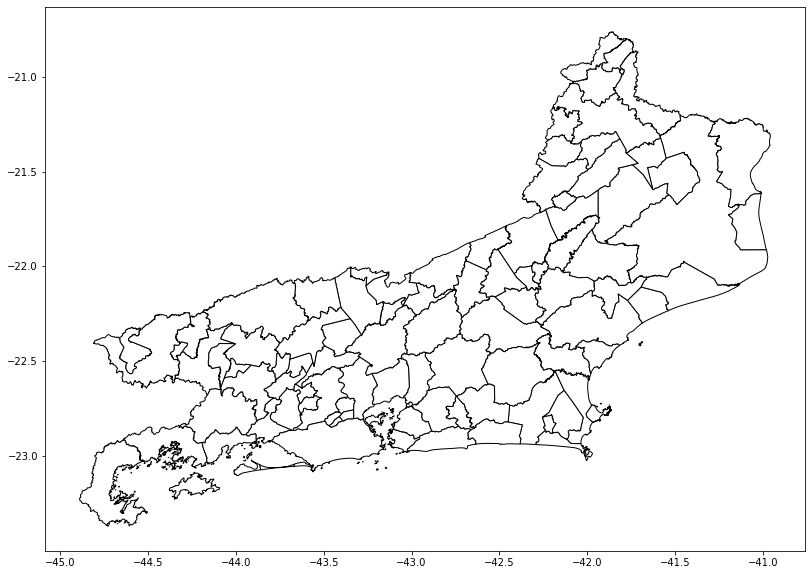

In [ ]:
#para potar o mapa com os dados com parâmetros desejados
rj.plot(color= 'white', edgecolor='black', figsize=(15, 10))

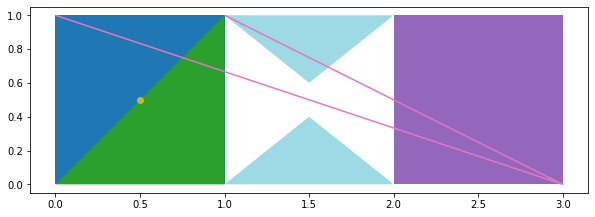

In [ ]:
#criando poligonos passando os valores 

poli1 = Polygon([(0,0), (1, 0), (1, 1), (0, 1)])
poli2 = Polygon([(0,0), (1, 0), (1, 1)])
poli3 = Polygon([(2,0), (3, 0), (3, 1), (2, 1)])

#forma LyneString
line1 = LineString([(0, 1), (3, 0), (1, 1)])
point1 = Point(0.5, 0.5)


#Criando um Multi polígono que não se tocam
poli6 = Polygon([(1,0), (1.5, 0.4), (2, 0)])
poli7 = Polygon([(1,1), (1.5, 0.6), (2, 1)])

multi_poli = MultiPolygon([poli6, poli7])



#multipoli passa como lista para o Geoseries 
geom = gpd.GeoSeries([poli1, poli2, poli3, line1, point1, multi_poli])
geom.plot(cmap='tab20', figsize= (10, 15))

In [ ]:
geom

0    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
1    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
2    POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....
3    LINESTRING (0.00000 1.00000, 3.00000 0.00000, ...
4                              POINT (0.50000 0.50000)
5    MULTIPOLYGON (((1.00000 0.00000, 1.50000 0.400...
dtype: geometry

##DataFrame e GeoDataframe


In [ ]:
rj

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33221..."
1,1469,3300159,APERIBÉ,"POLYGON ((-42.08950 -21.62893, -42.08912 -21.6..."
2,1470,3300209,ARARUAMA,"POLYGON ((-42.22526 -22.59253, -42.22521 -22.5..."
3,1471,3300225,AREAL,"POLYGON ((-43.16007 -22.20005, -43.16003 -22.1..."
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,"MULTIPOLYGON (((-41.98427 -22.74458, -41.98296..."
...,...,...,...,...
87,1555,3306008,TRÊS RIOS,"POLYGON ((-43.13666 -22.10933, -43.13182 -22.1..."
88,1556,3306107,VALENÇA,"POLYGON ((-43.82120 -22.08844, -43.82101 -22.0..."
89,1557,3306156,VARRE-SAI,"POLYGON ((-41.82695 -20.84164, -41.82686 -20.8..."
90,1558,3306206,VASSOURAS,"POLYGON ((-43.61208 -22.30841, -43.61113 -22.3..."


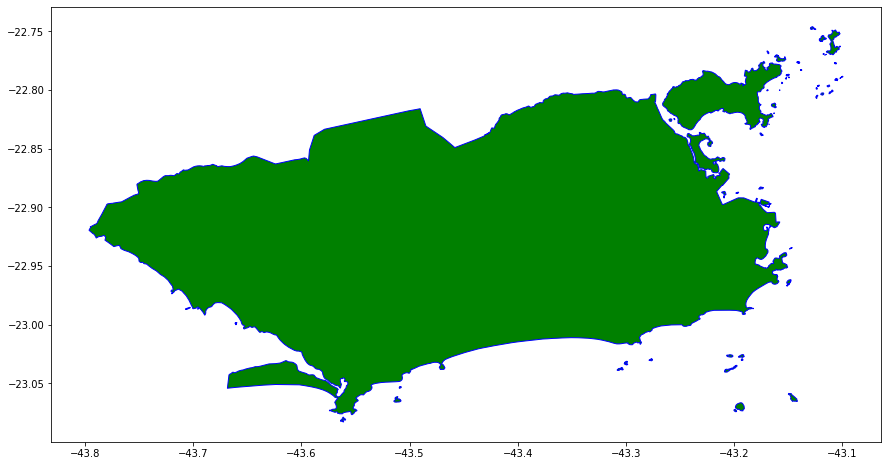

In [ ]:
#selecão do municipio do RJ, melhor se fosse outra variável RJ2
rj = rj[rj['NM_MUNICIP'] == 'RIO DE JANEIRO']

#plotagem deste municipio 
rj.plot(color='green', edgecolor='blue', figsize = (18,8))

In [ ]:
#criando um diretorio para salvar o arquivo selecionado e testando se o diretório existe, o nome do arquivo salvo será Rj_muni
import os 
dir = '/content/drive/MyDrive/Colab Notebooks/Cursos DataScience/Curso Geopandas/Mapas/RJ_Municip'
if not os.path.exists(dir):
  os.makedirs(dir)
else:
  pass

In [ ]:
#concatenando com o nome do diretorio 
rj.to_file(dir + '/RJ_Municip.shp')

In [ ]:
rj_muni = gpd.read_file(dir + '/RJ_Municip.shp')
rj_muni

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1535,3304557,RIO DE JANEIRO,"MULTIPOLYGON (((-43.12376 -22.80712, -43.12380..."


In [ ]:
#importando os dados com o Pandas  separados por tabulaçãp '/t' por default
dados = pd.read_table('/content/drive/MyDrive/Colab Notebooks/Cursos DataScience/Curso Geopandas/DataFrames/dados.txt')
dados

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000
4996,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000
4997,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000
4998,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000


In [ ]:
#usando a função para criar tuplas de coord para o GeoDataFrame
x = zip(dados.Longitude, dados.Latitude)
#list(x)

In [ ]:
#cria a coluna geometry com os pontos usando a função ZIP. Poderia usar a seleção dados['Longitude'] e dados['Latitude']
geometry = [Point(x) for x in zip(dados.Longitude, dados.Latitude)]
#list[geometry]

In [ ]:
#criando uma GeoDataFrame iserindo os dados do DataFrame + a geometry + valores de Datum 
crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}
geo_dados = gpd.GeoDataFrame(dados, crs=crs, geometry=geometry )

geo_dados

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (-43.46295 -23.01646)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (-43.33691 -22.94320)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (-43.30052 -22.87385)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (-43.41270 -22.98479)
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000,POINT (-51.92528 -14.23500)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,POINT (-43.55076 -22.87835)
4996,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,POINT (-43.48729 -23.02472)
4997,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,POINT (-43.20618 -22.95943)
4998,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,POINT (-43.26049 -22.91877)


In [ ]:
#LEMBRANDO QUE RJ NO CURSO É RJ_MUNI NESTE PROJETO
#salvando os dados trabalhados
dir = '/content/drive/MyDrive/Colab Notebooks/Cursos DataScience/Curso Geopandas/Mapas/RJ_GeoDataFrame'
if not os.path.exists(dir):
  os.makedirs(dir)

geo_dados.to_file(dir + '/DATASET.shp')

##Sistema de Coordenadas

In [ ]:
#verifica qual o coordenate reference system
rj_muni.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
geo_dados.crs

<Geographic 2D CRS: +proj=latlong +ellps=WGS84 +datum=WGS84 +no_defs + ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
#REPROJETANDO a crs do shapefile : rj_muni e do GeoDataFrame : geo_dados
rj_muni = rj_muni.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
geo_dados = geo_dados.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [ ]:
rj_muni.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [ ]:
geo_dados.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [ ]:
#sobreescrever e salvar com novos valores CRS 
rj_muni.to_file('/content/drive/MyDrive/Colab Notebooks/Cursos DataScience/Curso Geopandas/Mapas/RJ_Municip/RJ_Municip.shp')
geo_dados.to_file('/content/drive/MyDrive/Colab Notebooks/Cursos DataScience/Curso Geopandas/Mapas/RJ_GeoDataFrame/DATASET.shp')

In [ ]:
rj2 = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Cursos DataScience/Curso Geopandas/Mapas/RJ_Municip/RJ_Municip.shp')
rj2

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1535,3304557,RIO DE JANEIRO,"MULTIPOLYGON (((692.576 7476.609, 692.572 7476..."


In [ ]:
#testando a conversão CRS
geo_dados2 = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Cursos DataScience/Curso Geopandas/Mapas/RJ_GeoDataFrame/DATASET.shp')
geo_dados2

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284)
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000,POINT (-248.715 8415.117)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,POINT (648.664 7469.216)
4996,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,POINT (655.010 7452.944)
4997,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,POINT (683.909 7459.848)
4998,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,POINT (678.393 7464.417)


##Filtrando imóveis por região | Tratamento de Dados

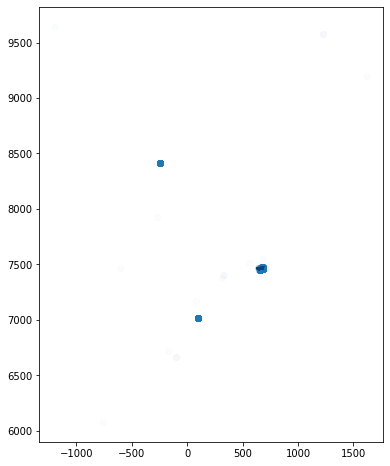

In [ ]:
#Selecionando pontos dentro de uma região 
base = rj_muni.plot(color='black', edgecolor='black', figsize=(15, 8))
# plotando o mapa do RJ_muni com a base do geo dados, dentro do próprio GDF geo_dados parâmetro |ax = base|
geo_dados.plot(ax=base, figsize=(15, 8), alpha=0.02) 
 # alpha te permite visualizar dados por trás do gráfico, dados espalhados dentro da amostragem

In [ ]:
#seleciona o primeiro ponto do shape rj_muni 
rj_muni.iloc[0]

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/printing.py:118: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  s = iter(seq)
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/printing.p

ID                                                         1535
CD_GEOCODM                                              3304557
NM_MUNICIP                                       RIO DE JANEIRO
geometry      (POLYGON ((692.5758012880638 7476.609203982483...
Name: 0, dtype: object

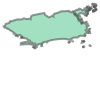

In [ ]:
#retorna a geometria do shape 
rj.iloc[0].geometry

In [ ]:
geo_dados.iloc[0]

Area                                                 138
Bairro                          Recreio dos Bandeirantes
Cidade                                    Rio de Janeiro
Endereco                             Rua Vicente Scofano
Estado                                                RJ
Latitude                                      -23.016455
Longitude                                     -43.462946
Quartos                                                3
Suites                                                 1
Vagas                                                  3
Tipo                                         Apartamento
Transacao                                          Venda
Valor                                            1095000
geometry     POINT (657.5137068691058 7453.832425203198)
Name: 0, dtype: object

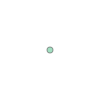

In [ ]:
geo_dados.iloc[0].geometry

In [ ]:
# função within calcula se o ponto representado pela linha 41 está dentro da geometria do shape do rj_muni
# lembre-se que rj = rj_muni neste proejto
geo_dados.iloc[0].geometry.within(rj_muni.iloc[0].geometry)

True

In [ ]:
#esta expressão irá percorrer toda coluna 'geometry' e validar se o ponto está dentro do shape do rj_muni, retornando um Series Bool
#isto é uma seleção, poderia salvar dentro de uma variável pra organizar. BOAS PRÁTICAS !
geo_dados['geometry'].within(rj_muni.iloc[0].geometry)

0        True
1        True
2        True
3        True
4       False
        ...  
4995     True
4996     True
4997     True
4998     True
4999     True
Length: 5000, dtype: bool

In [ ]:
#verificar dados que estão fora do nosso escopo de análise
geo_dados

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284)
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000,POINT (-248.715 8415.117)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,POINT (648.664 7469.216)
4996,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,POINT (655.010 7452.944)
4997,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,POINT (683.909 7459.848)
4998,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,POINT (678.393 7464.417)


In [ ]:
#amosta de resultados para avaliação dos dados 
amostra = geo_dados.iloc[:12]
amostra

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284)
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000,POINT (-248.715 8415.117)
5,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574)
6,74,Tijuca,Rio de Janeiro,Rua Amoroso Costa,RJ,-22.933575,-43.247109,3,2,1,Apartamento,Venda,595000,POINT (679.746 7462.762)
7,200,Copacabana,Rio de Janeiro,Rua Souza Lima,RJ,-22.982300,-43.192534,4,1,1,Apartamento,Venda,2100000,POINT (685.278 7457.298)
8,119,Barra da Tijuca,Rio de Janeiro,Península Fit,RJ,-14.235004,-51.925280,3,2,2,Apartamento,Venda,1130000,POINT (-248.715 8415.117)
9,88,Flamengo,Rio de Janeiro,Rua Senador Vergueiro,RJ,-22.936402,-43.175411,2,2,1,Apartamento,Venda,1450000,POINT (687.096 7462.359)


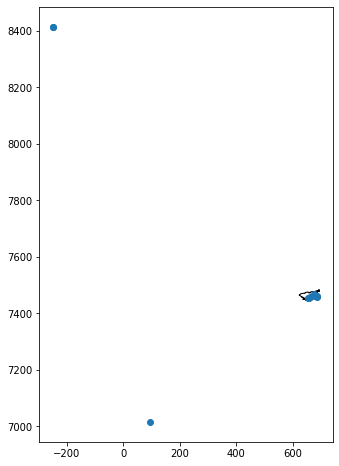

In [ ]:
#esta amostra demonstra os ponto que estão dentro do shape rj_muni e alguns que estão fora 
base = rj_muni.plot(color='white', edgecolor='black', figsize=(15, 8))
amostra.plot(ax=base, figsize=(15, 8), alpha=1) 


In [ ]:
qtde_dados_antes = geo_dados.shape[0]

In [ ]:
# neste ponto, para evitar a criação de muitas variáveis, vamos substituir a antiga Var |geo_dados| pelo novo GDF filtrado
geo_dados = geo_dados[geo_dados['geometry'].within(rj_muni.iloc[0].geometry)]

In [ ]:
qtde_dados_depois = geo_dados.shape[0]

In [ ]:
#quantos dados foram eliminados do GDF
qtde_dados_antes - qtde_dados_depois

487

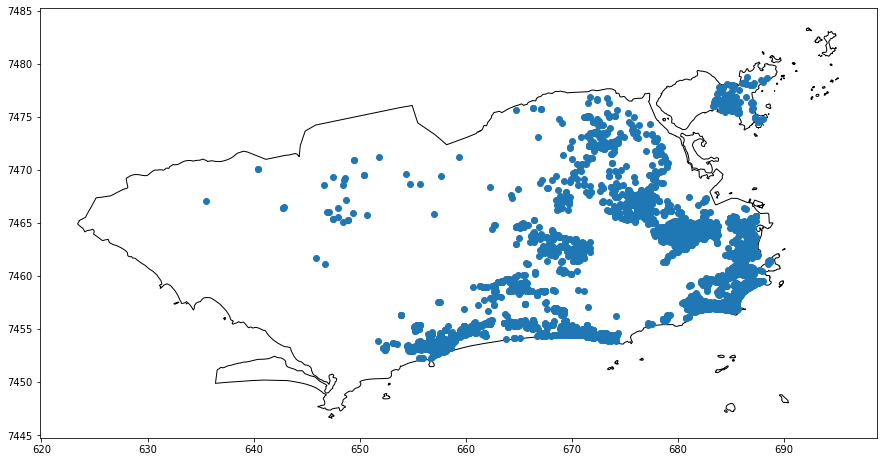

In [ ]:
#Replotagem dos geo_dados já manipulados e filtrados 
base = rj_muni.plot(color='white', edgecolor='black', figsize=(15, 8))
geo_dados.plot(ax=base, figsize=(15, 8), alpha=1) 


In [ ]:
geo_dados.to_file('/content/drive/MyDrive/Colab Notebooks/Cursos DataScience/Curso Geopandas/Mapas/RJ_GeoDataFrame/DATASET.shp')

In [ ]:
metro = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Cursos DataScience/Curso Geopandas/Transporte/Transporte/Metrô/Estações_Metrô.geojson')

In [ ]:
metro.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
#arquivo GeoJASON com as localizações das estações de metrô georeferenciadas, necessário converter o CRS para encaixar no mesmo padrão
metro = metro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
metro.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

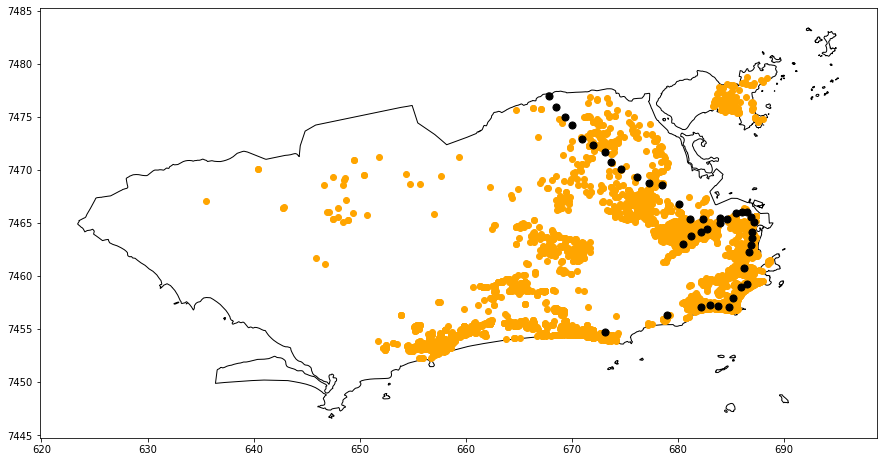

In [ ]:
#neste ponto plotamos os dados do mapa do rj_muni + o GDF do geo_dados + as estações de metrô com o metro 
#lembrando do que o parâmetro axis é que define qual a base para estes dados 
base = rj_muni.plot(color='white', edgecolor='black', figsize=(15, 8))
geo_dados.plot(ax=base, color = 'orange', figsize=(15, 8), alpha=1) 
metro.plot(ax = base, color = 'black', markersize = 50 )

In [ ]:
distance = metro.distance(geo_dados.iloc[0].geometry)
distance

0     25.321516
1     24.623350
2     24.224237
3     23.881158
4     23.357575
5     23.523396
6     23.658163
7     23.401048
8     23.644084
9     24.209373
10    24.795188
11    25.596665
12    26.033173
13    26.295764
14    27.398579
15    28.659654
16    25.773027
17    26.716983
18    27.377518
19    30.455326
20    31.034097
21    31.466395
22    31.662650
23    31.695780
24    31.232661
25    31.026518
26    30.727260
27    30.401336
28    29.515734
29    29.476829
30    28.850631
31    29.407590
32    27.940690
33    28.901631
34    27.475584
35    24.743520
36    26.507063
37    25.728350
38    24.822792
39    21.589055
40    15.622939
dtype: float64

In [ ]:
distance.min()

15.62293882499506

In [ ]:
#Criar uma nova coluna para armanezar a distância entre as estações 
#utilizamos a função apply que percorre cada linha da coluna, modificando cada nova linha com a função lambda com parâmetros da distância 
#mínima entre cada ponto e a estação de metrô
geo_dados['Dis_Metro'] = geo_dados['geometry'].apply(lambda x: metro.distance(x).min())

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
#geo_dados para visualizar a nova coluna com a distância mínima

In [ ]:
#aplicando a estatítistica de PEARSON para saber a correlação entre valor do imóvel e distância
geo_dados.corr()

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,Dis_Metro
Area,1.000000,-0.289299,0.029982,0.681112,0.585817,0.594699,0.724397,-0.036671
Latitude,-0.289299,1.000000,0.292822,-0.225226,-0.346480,-0.274707,-0.299038,-0.217864
Longitude,0.029982,0.292822,1.000000,-0.016882,-0.221548,-0.283960,0.191868,-0.874788
Quartos,0.681112,-0.225226,-0.016882,1.000000,0.529611,0.520499,0.481216,0.021794
Suites,0.585817,-0.346480,-0.221548,0.529611,1.000000,0.621140,0.464075,0.188521
Vagas,0.594699,-0.274707,-0.283960,0.520499,0.621140,1.000000,0.456596,0.215787
Valor,0.724397,-0.299038,0.191868,0.481216,0.464075,0.456596,1.000000,-0.195641
Dis_Metro,-0.036671,-0.217864,-0.874788,0.021794,0.188521,0.215787,-0.195641,1.000000


In [ ]:
#isolar o método PEARSON apenas entre o Valor do imóvel e a distância entre o metrô
coef = geo_dados['Valor'].corr(geo_dados['Dis_Metro'])
coef

-0.1956408316168689

In [ ]:
#salvar manipulação estatistica dos data frames em um novo arquivo 
geo_dados.to_file('/content/drive/MyDrive/Colab Notebooks/Cursos DataScience/Curso Geopandas/Mapas/RJ_GeoDataFrame/DATASET.shp')

##Exercicio

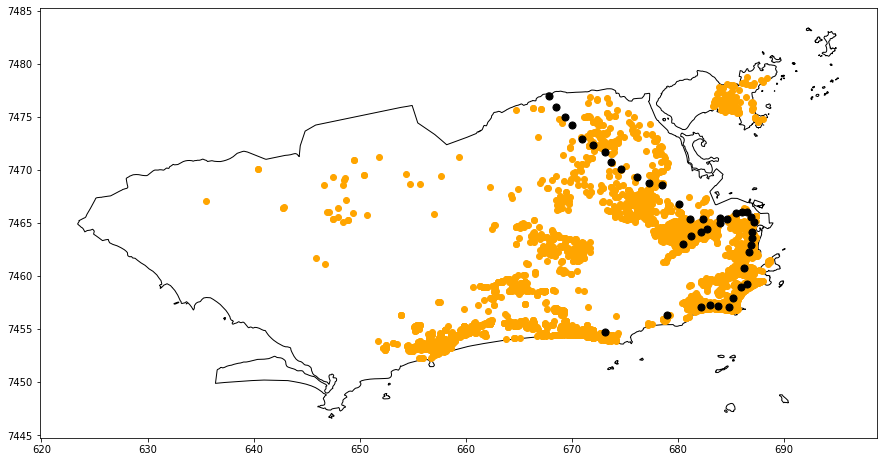

In [ ]:
###### EXERCICIO ########

base = rj_muni.plot(color='white', edgecolor='black', figsize=(15, 8))
geo_dados.plot(ax=base, color = 'orange', figsize=(15, 8), alpha=1) 
metro.plot(ax = base, color = 'black', markersize = 50 )

In [ ]:
#variáveis
coord = {'Latitude':[-22.9531, -23.0278, -22.8463, -22.8969],	'Longitude' : [-43.1884, -43.4665, -43.3007, -43.3165]   }
geometria = [Point(x) for x in zip(coord['Longitude'], coord['Latitude'])]
df_exer = pd.DataFrame(data=coord)
crs_exer = {'init': 'epsg:4326'}
geo_data_frame = gpd.GeoDataFrame(df_exer, crs=crs_exer, geometry=geometria )


/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
df_exer

,Latitude,Longitude,geometry
0,-22.9531,-43.1884,POINT (-43.18840 -22.95310)
1,-23.0278,-43.4665,POINT (-43.46650 -23.02780)
2,-22.8463,-43.3007,POINT (-43.30070 -22.84630)
3,-22.8969,-43.3165,POINT (-43.31650 -22.89690)


In [ ]:
geo_data_frame

,Latitude,Longitude,geometry
0,-22.9531,-43.1884,POINT (-43.18840 -22.95310)
1,-23.0278,-43.4665,POINT (-43.46650 -23.02780)
2,-22.8463,-43.3007,POINT (-43.30070 -22.84630)
3,-22.8969,-43.3165,POINT (-43.31650 -22.89690)


In [ ]:
geo_data_frame.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

,Latitude,Longitude,geometry
0,-22.9531,-43.1884,POINT (685.741 7460.527)
1,-23.0278,-43.4665,POINT (657.136 7452.580)
2,-22.8463,-43.3007,POINT (674.361 7472.491)
3,-22.8969,-43.3165,POINT (672.676 7466.906)


In [ ]:
distan_exer = metro.distance(geo_data_frame.iloc[0].geometry)
distan_exer

0     7533.539583
1     7532.529867
2     7531.694689
3     7530.981744
4     7529.825315
5     7529.335015
6     7528.748361
7     7527.882174
8     7527.361615
9     7526.742227
10    7526.319759
11    7526.170715
12    7524.607929
13    7523.287125
14    7523.393736
15    7523.122432
16    7521.731082
17    7522.184961
18    7522.513742
19    7524.208312
20    7524.420201
21    7524.449308
22    7524.040323
23    7523.589345
24    7522.652202
25    7522.003808
26    7521.412609
27    7520.686669
28    7519.146078
29    7517.693375
30    7517.359990
31    7523.560456
32    7516.248547
33    7523.636356
34    7515.327751
35    7520.828067
36    7515.349623
37    7515.387998
38    7515.064941
39    7514.022232
40    7511.913082
dtype: float64

In [ ]:
metro['Nome']

0                       Pavuna
1      Engenheiro Rubens Paiva
2     Acari / Fazenda Botafogo
3                  Coelho Neto
4                      Colégio
5                        Irajá
6          Vicente de Carvalho
7                 Tomaz Coelho
8            Engenho da Rainha
9                      Inhauma
10                Del Castilho
11              Maria da Graça
12                     Triagem
13                    Maracanã
14               São Cristóvão
15                     Estácio
16                  Saens Peña
17        São Francisco Xavier
18                 Afonso Pena
19                     Central
20           Presidente Vargas
21                  Uruguaiana
22                     Carioca
23                  Cinelândia
24                      Glória
25                      Catete
26            Largo do Machado
27                    Flamengo
28                    Botafogo
29           Cardeal Arcoverde
30             Siqueira Campos
31                  Praca Onze
32      

##Agregando outras localizações

###Estações de TREM 

In [ ]:
trem = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Cursos DataScience/Curso Geopandas/Transporte/Transporte/Trem/Estações_Trem.geojson')

In [ ]:
trem.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

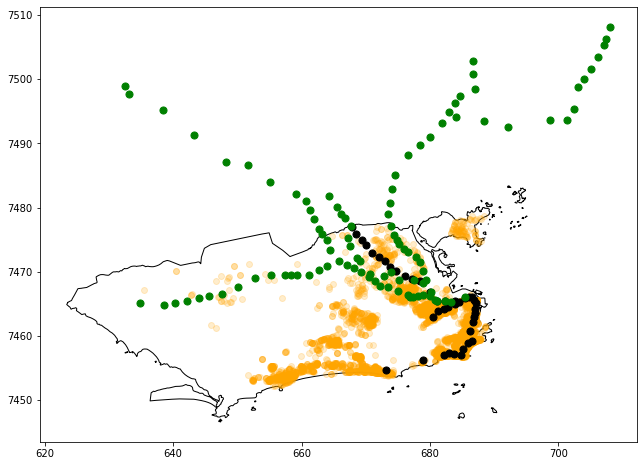

In [ ]:
trem = trem.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
base = rj_muni.plot(color='white', edgecolor='black', figsize=(15, 8))
geo_dados.plot(ax=base, color = 'orange', alpha=0.2) 
metro.plot(ax=base, color = 'black', markersize= 50)
trem.plot(ax=base, color='green', markersize=50)

In [ ]:
#seleção dos pontos das estações de Trem que estão dentro do polígono do rj_muni
trem = trem[trem.within(rj_muni.iloc[0].geometry)]


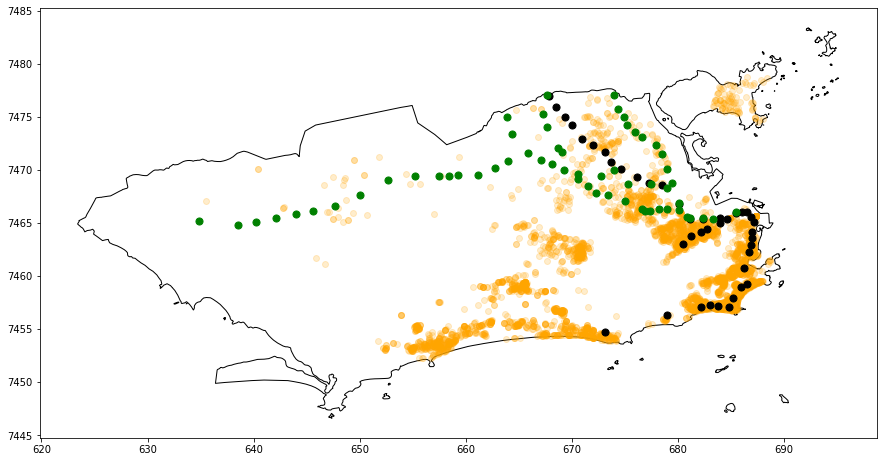

In [ ]:
base = rj_muni.plot(color='white', edgecolor='black', figsize=(15, 8))
geo_dados.plot(ax=base, color = 'orange', alpha=0.2) 
metro.plot(ax=base, color = 'black', markersize= 50)
trem.plot(ax=base, color='green', markersize=50)

###Estações BRT

In [ ]:
# o mesmos passos serão realizados para a leitura de novos geodados
brt = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Cursos DataScience/Curso Geopandas/Transporte/Transporte/BRT/Estações_BRT.geojson')

In [ ]:
brt

,OBJECTID,Nome,Flg_Ativo,Status,X,Y,Flg_TransCarioca,Flg_TransBrasil,Flg_TransOeste,Flg_TransOlimpica,ChaveGeo,Data_Inc,Integra_Trem,Integra_Metro,Integra_Aeroporto,geometry
0,1,Santa Luzia,1,1,679342.4694,7.471500e+06,1,0,0,0,None,None,0.0,0.0,0.0,POINT (-43.25244 -22.85513)
1,2,Maré,1,1,680236.1565,7.472380e+06,1,0,0,0,None,None,0.0,0.0,0.0,POINT (-43.24383 -22.84709)
2,3,Cardoso de Moraes - Viúva Garcia,1,1,678744.0560,7.471252e+06,1,0,0,0,None,None,0.0,0.0,0.0,POINT (-43.25824 -22.85743)
3,4,Penha I,1,1,676833.5642,7.473029e+06,1,0,0,0,None,None,0.0,0.0,0.0,POINT (-43.27706 -22.84158)
4,5,Penha II,1,1,676873.5062,7.472977e+06,1,0,0,0,None,None,0.0,0.0,0.0,POINT (-43.27666 -22.84205)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,158,Marechal Fontenelle,1,1,664095.9896,7.468251e+06,0,0,0,1,None,None,0.0,0.0,0.0,POINT (-43.40065 -22.88602)
157,159,Marechal Mallet,1,1,663615.1812,7.469374e+06,0,0,0,1,None,None,0.0,0.0,0.0,POINT (-43.40545 -22.87593)
158,160,Magalhães Bastos,1,1,662717.0295,7.470178e+06,0,0,0,1,None,None,0.0,0.0,0.0,POINT (-43.41429 -22.86876)
159,161,Vila Militar,1,1,664022.2312,7.470841e+06,0,0,0,1,None,None,1.0,0.0,0.0,POINT (-43.40164 -22.86265)


In [ ]:
brt.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
brt = brt.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')


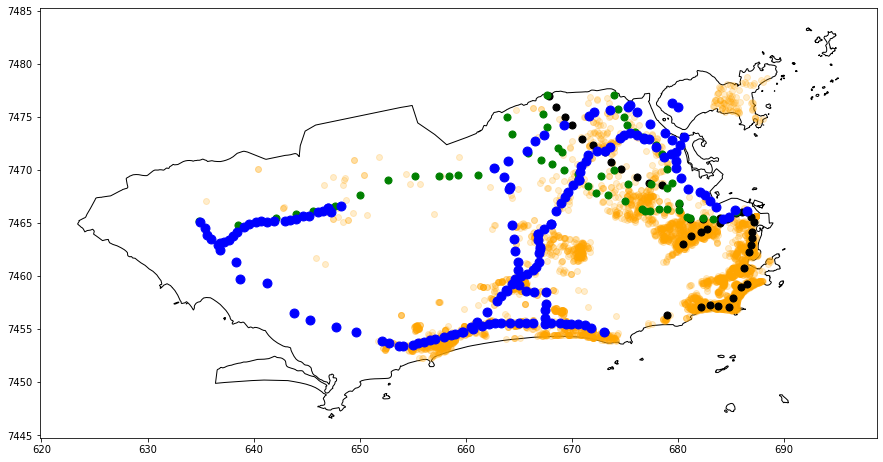

In [ ]:
base = rj_muni.plot(color='white', edgecolor='black', figsize=(15, 8))
geo_dados.plot(ax=base, color = 'orange', alpha=0.2) 
metro.plot(ax=base, color = 'black', markersize= 50)
trem.plot(ax=base, color='green', markersize=50)
brt.plot(ax=base, color='blue', markersize=80)

In [ ]:
##concatenar apenas os dados necessários em uma GeoSeries apenas, deletando as informações inúteis ao projeto 
#lembrando que por default a função concat une as colunas verticalmente no GDF e a funçao ignore_index exclui os index que seriam adicionados

transporte = pd.concat([trem.geometry, metro.geometry, brt.geometry], ignore_index=True)

##Unindo dados de transporte

In [ ]:
type(transporte)

geopandas.geoseries.GeoSeries

In [ ]:
transporte

0      POINT (676.866 7466.079)
1      POINT (663.964 7470.815)
2      POINT (662.792 7470.218)
3      POINT (661.119 7469.485)
4      POINT (659.274 7469.469)
                 ...           
257    POINT (664.056 7468.207)
258    POINT (663.576 7469.330)
259    POINT (662.677 7470.133)
260    POINT (663.983 7470.796)
261    POINT (664.181 7468.397)
Length: 262, dtype: geometry

In [ ]:
#distancia entre os domicilios e cada ponto de transporte unido 
geo_dados['Distancia_Transporte'] = geo_dados['geometry'].apply(lambda x: transporte.distance(x).min())

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
geo_dados.to_file('/content/drive/MyDrive/Colab Notebooks/Cursos DataScience/Curso Geopandas/Mapas/RJ_GeoDataFrame/DATASET.shp')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  """Entry point for launching an IPython kernel.


##Distância até a praia

In [ ]:
praias = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Cursos DataScience/Curso Geopandas/DataFrames/Vegetação e Uso do Solo/Cobertura_Vegetal_e_Uso_da_Terra_2016.geojson')

In [ ]:
praias = praias.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

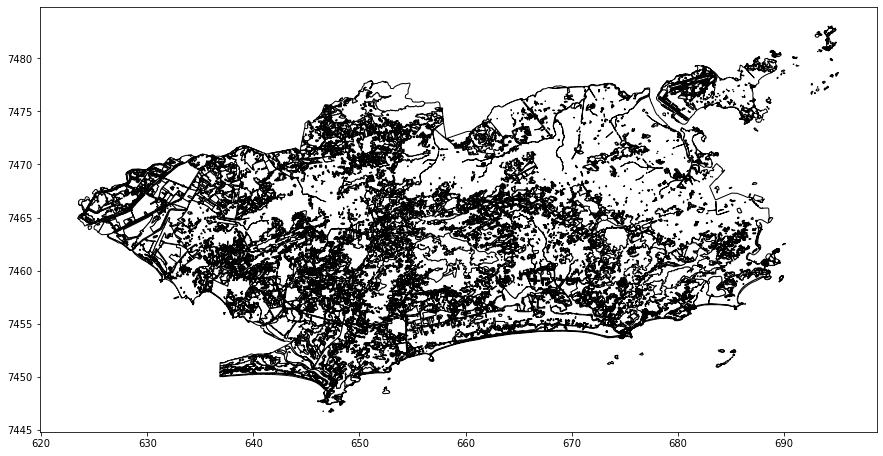

In [ ]:
praias.plot(color= 'white', edgecolor = 'black', figsize = (15, 8))

In [ ]:
#contagem das frequências de cada atributo no GDF das praias 
praias['legenda'].value_counts()

Vegetação arbórea não florestal                                     3495
Vegetação gramíneo-lenhosa                                          2022
Floresta Ombrófila Densa, Estágio Inicial                            643
Áreas Urbanas                                                        639
Afloramento Rochoso                                                  474
Uso agrícola, Lavoura Permanente                                     445
Floresta Ombrófila Densa, Estágio Médio                              414
Corpos d’água continentais                                           388
Reflorestamento                                                      252
Formação Pioneira com influência flúvio-lacustre, Brejo herbáceo     210
Uso agrícola, Lavoura Temporária                                     164
Formação Pioneira com influência flúvio-marinha, Manguezal           161
Solo exposto                                                         152
Formação Pioneira com influência flúvio-marinha, Ca

In [ ]:
#seleciona apenas os objetos praias dentro da coluna legenda do GDF
praias = praias[praias['legenda'] == 'Praia']

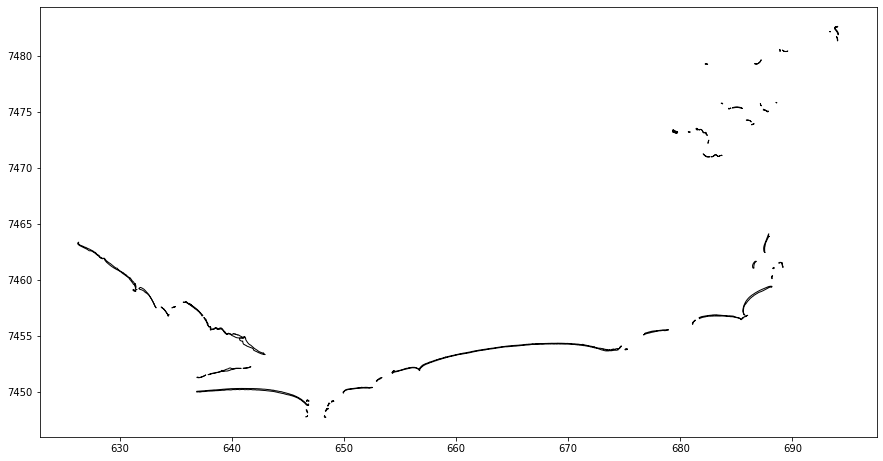

In [ ]:
praias.plot(color= 'white', edgecolor = 'black', figsize = (15, 8))

In [ ]:
#calcular a distância de todos os pontos de transporte até a praia 
geo_dados['Dist_Praia'] = geo_dados['geometry'].apply(lambda x : praias.distance(x).min())

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
geo_dados

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry,Dis_Metro,Distancia_Transporte,Dist_Praia
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832),15.622939,0.443193,1.143453
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803),7.530741,3.642787,7.478698
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440),0.736973,0.641470,6.240694
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284),10.718039,0.422370,3.404589
5,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574),17.131159,0.214605,1.369015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,POINT (648.664 7469.216),20.667831,2.129366,16.133493
4996,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,POINT (655.010 7452.944),18.189134,0.563492,0.955964
4997,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,POINT (683.909 7459.848),2.180300,2.180300,2.612550
4998,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,POINT (678.393 7464.417),2.558248,1.871081,7.679812


In [ ]:
geo_dados.to_file('/content/drive/MyDrive/Colab Notebooks/Cursos DataScience/Curso Geopandas/Mapas/RJ_GeoDataFrame/DATASET.shp')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  """Entry point for launching an IPython kernel.


In [ ]:
rua = geo_dados['Endereco'] == 'Rua Anita Garibaldi'
geo_dados[rua]

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry,Dis_Metro,Distancia_Transporte,Dist_Praia
1299,120,Copacabana,Rio de Janeiro,Rua Anita Garibaldi,RJ,-22.969434,-43.187653,3,1,0,Apartamento,Venda,1400000,POINT (685.796 7458.717),0.272356,0.272356,0.444915
1986,215,Copacabana,Rio de Janeiro,Rua Anita Garibaldi,RJ,-22.968661,-43.188492,3,1,1,Apartamento,Venda,2500000,POINT (685.711 7458.804),0.252946,0.252946,0.566040
4690,160,Copacabana,Rio de Janeiro,Rua Anita Garibaldi,RJ,-22.968132,-43.188724,3,1,1,Apartamento,Venda,2600000,POINT (685.687 7458.862),0.240169,0.240169,0.622713
4803,211,Copacabana,Rio de Janeiro,Rua Anita Garibaldi,RJ,-22.968755,-43.188625,3,1,1,Apartamento,Venda,1800000,POINT (685.697 7458.793),0.270079,0.270079,0.569455
